In [10]:
from pathlib import Path
gpx_file_path = Path.home() / 'Documents/BikewaySimData/Projects/gdot/gps_traces'

# Read GPX data from the file
with open(gpx_file_path/'output.gpx', "rb") as gpx_file:
    gpx_data = gpx_file.read()

In [11]:
import gpxpy
import gpxpy.gpx

gpx = gpxpy.gpx.GPX()

# Create first track in our GPX:
gpx_track = gpxpy.gpx.GPXTrack()
gpx.tracks.append(gpx_track)

# Create first segment in our GPX track:
gpx_segment = gpxpy.gpx.GPXTrackSegment()
gpx_track.segments.append(gpx_segment)

# Create points:
for idx in trace.index:
    gpx_segment.points.append(gpxpy.gpx.GPXTrackPoint(trace.loc[idx, 'lat'], trace.loc[idx, 'lon']))

# print(gpx.to_xml())

with open(export_fp/'output.gpx', 'w') as f:
    f.write(gpx.to_xml())

b'\r\n<gpx>\r\n  <trk>\r\n    <trkseg>\r\n      <trkpt lat="33.763506" lon="-84.314592">\r\n      </trkpt>\r\n      <trkpt lat="33.763684" lon="-84.314613">\r\n      </trkpt>\r\n      <trkpt lat="33.76386" lon="-84.314609">\r\n      </trkpt>\r\n      <trkpt lat="33.764059" lon="-84.314647">\r\n      </trkpt>\r\n      <trkpt lat="33.764213" lon="-84.314651">\r\n      </trkpt>\r\n      <trkpt lat="33.764396" lon="-84.314654">\r\n      </trkpt>\r\n      <trkpt lat="33.764573" lon="-84.314642">\r\n      </trkpt>\r\n      <trkpt lat="33.76474" lon="-84.314671">\r\n      </trkpt>\r\n      <trkpt lat="33.764732" lon="-84.31489">\r\n      </trkpt>\r\n      <trkpt lat="33.764697" lon="-84.315096">\r\n      </trkpt>\r\n      <trkpt lat="33.764642" lon="-84.315315">\r\n      </trkpt>\r\n      <trkpt lat="33.764591" lon="-84.315546">\r\n      </trkpt>\r\n      <trkpt lat="33.7645" lon="-84.315851">\r\n      </trkpt>\r\n      <trkpt lat="33.764426" lon="-84.316088">\r\n      </trkpt>\r\n      <trkp

In [40]:
import requests

url = "https://graphhopper.com/api/1/match"

# Set up headers and parameters
headers = {
    "Content-Type": "application/gpx+xml",
}

query = {
  "gps_accuracy": "5",
  "profile": "bike",
  "points_encoded": "false",
  "key": "b3fcb3f5-552b-474d-9cbd-dc198f99d07f"
}

response = requests.post(url, headers=headers, params=query, data=gpx_data)

data = response.json()
print(data)

{'hints': {}, 'info': {'copyrights': ['GraphHopper', 'OpenStreetMap contributors'], 'took': 295, 'road_data_timestamp': '2024-01-29T10:00:00Z'}, 'paths': [{'distance': 14848.602, 'weight': 9223372036854.775, 'time': 5560155, 'transfers': 0, 'points_encoded': False, 'bbox': [-84.386109, 33.75973, -84.312716, 33.766641], 'points': {'type': 'LineString', 'coordinates': [[-84.314603, 33.763506], [-84.314597, 33.764672], [-84.313851, 33.7647], [-84.313849, 33.7648], [-84.314667, 33.764724], [-84.31467, 33.764318], [-84.314667, 33.764724], [-84.314898, 33.764691], [-84.315426, 33.764583], [-84.315884, 33.764465], [-84.316186, 33.764364], [-84.316731, 33.764128], [-84.316888, 33.764049], [-84.319597, 33.76247], [-84.319815, 33.762927], [-84.31967, 33.762906], [-84.319632, 33.762944], [-84.3171, 33.764431], [-84.316805, 33.764583], [-84.316239, 33.764799], [-84.315591, 33.764965], [-84.314746, 33.765125], [-84.313936, 33.765212], [-84.312716, 33.765296], [-84.313936, 33.765212], [-84.314746, 3

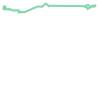

In [48]:
from shapely.ops import LineString

LineString(data['paths'][0]['points']['coordinates'])



In [50]:
import folium

# Assuming 'data' is a dictionary with a LineString in GeoJSON-like format
line_coords = data['paths'][0]['points']['coordinates']

# Create a Folium map centered at the first coordinate of the LineString
m = folium.Map(location=[line_coords[0][1], line_coords[0][0]], zoom_start=10)

# Create a GeoJSON LineString feature
line_feature = {
    "type": "LineString",
    "coordinates": line_coords
}

# Add GeoJSON to the map
folium.GeoJson(line_feature, name="line").add_to(m)

# Save the map as an HTML file or display it
#m.save("map_with_linestring.html")
m
# m.show()  # Uncomment this line if you want to display the map in a Jupyter notebook


In [37]:
import polyline

polyline_str = data['paths'][0]['points']

# Decode the polyline string
decoded_coordinates = polyline.decode(polyline_str)

# Print the list of coordinates
print(decoded_coordinates)

[(33.7635, -84.31461), (33.76467, -84.3146), (33.7647, -84.31386), (33.76479, -84.31385), (33.76472, -84.31467), (33.76431, -84.31467), (33.76472, -84.31467), (33.76469, -84.3149), (33.76458, -84.31543), (33.76446, -84.31589), (33.76436, -84.31619), (33.76412, -84.31674), (33.76404, -84.31689), (33.76247, -84.3196), (33.76292, -84.31982), (33.7629, -84.31967), (33.76294, -84.31964), (33.76443, -84.3171), (33.76458, -84.31681), (33.76479, -84.31624), (33.76496, -84.3156), (33.76512, -84.31475), (33.76521, -84.31394), (33.76529, -84.31272), (33.76521, -84.31394), (33.76512, -84.31475), (33.76496, -84.3156), (33.76479, -84.31624), (33.76458, -84.31681), (33.76443, -84.3171), (33.76294, -84.31964), (33.7629, -84.31967), (33.76292, -84.31982), (33.76335, -84.32003), (33.76356, -84.32015), (33.76369, -84.32027), (33.76377, -84.32038), (33.76405, -84.32133), (33.76435, -84.32195), (33.76441, -84.32204), (33.76447, -84.32203), (33.7645, -84.32207), (33.76457, -84.32189), (33.76494, -84.32113),

In [28]:
import requests

url = "https://graphhopper.com/api/1/match"
api_key = "[YOUR_KEY]"  # Replace with your actual GraphHopper API key
gpx_file_path = "/path/to/some.gpx"  # Replace with the actual path to your GPX file

with open(gpx_file_path, "rb") as gpx_file:
    gpx_data = gpx_file.read()

headers = {
    "Content-Type": "application/gpx+xml",
}

params = {
    "profile": "car",
    "key": api_key,
}

response = requests.post(url, headers=headers, params=params, data=gpx_data)

if response.status_code == 200:
    # Successful response, handle the result
    result = response.json()
    print(result)
else:
    # Handle errors
    print(f"Error: {response.status_code}, {response.text}")


FileNotFoundError: [Errno 2] No such file or directory: '/path/to/some.gpx'